In [1]:
# load pruned ontology
from ddot import Ontology
data_root = '~/ontoPrune/data/'

prune_go = Ontology.read_pickle(data_root + 'prune_go_0.95') # select high gene-term

In [2]:
prune_go

19626 genes, 477 terms, 64852 gene-term relations, 478 term-term relations
node_attributes: []
edge_attributes: ['Annotation Extension', 'Aspect', 'Assigned By', 'DB', 'DB Object ID', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'DB:Reference', 'Date', 'Evidence Code', 'Gene Product Form ID', 'Qualifier', 'Taxon', 'With (or) From', 'biological_process', 'is_a']

In [3]:
# load term entropy (with gene ontology name)
import pandas as pd
term_entropy = pd.read_pickle(data_root + 'term_entropy.pickle')

In [4]:
term_entropy.head()

,direct gene count,indirect gene count,term count,normalized entropy,name,level,depth
GO:0000002,12.0,22,1.0,0.734947,mitochondrial genome maintenance,5,5
GO:0000003,5.0,1462,3.0,0.517207,reproduction,1,1
GO:0000010,2.0,2,0.0,1.000000,trans-hexaprenyltranstransferase activity,4,4
GO:0000012,12.0,13,2.0,0.969207,single strand break repair,6,8
GO:0000014,10.0,11,1.0,0.963938,single-stranded DNA endodeoxyribonuclease acti...,5,7


In [5]:
from igraph import *
def visualize_branch(term, ont, term_entropy):
    # convert to igraph
    ig_object = ont.focus(term).unfold().to_igraph()
    
    ig_object.vs['shape'] = ['rectangle' if 'GO:' in n else 'circle' for n in ig_object.vs['name']]
    ig_object.vs['size'] = [30 if 'GO:' in n else 16 for n in ig_object.vs['name']]
    ig_object.vs['color'] = ['pink' if 'GO:' in n else 'grey' for n in ig_object.vs['name']]
    ig_object.vs['label'] = [term_entropy.loc[n[:-2],'name'].replace(' ', '\n') if 'GO:' in n else n[:-2] for n in ig_object.vs['name']]
    
    
    visual_style = {}
    visual_style["vertex_label_size"] = 6
    visual_style["edge_arrow_size"] = 0
    
    
    return(plot(ig_object, **visual_style))

Genes and Terms to keep: 3


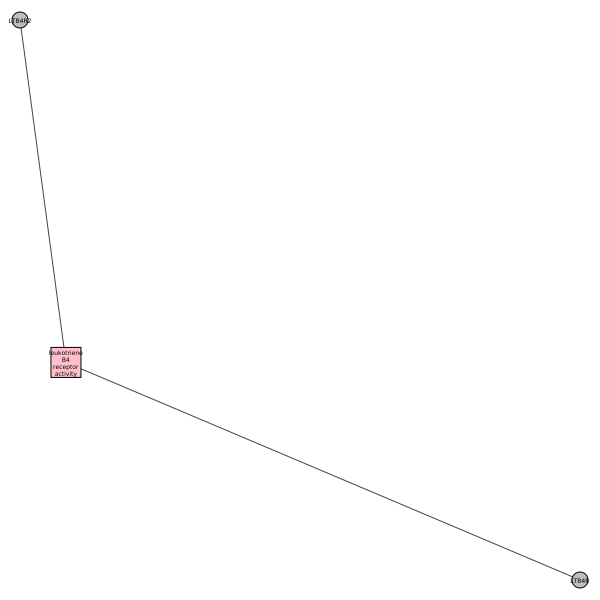

In [8]:
%matplotlib inline
visualize_branch('GO:0001632', prune_go, term_entropy)

In [9]:
import numpy as np
def visualize_all_term(ont, term_entropy, root = 'GO:0008150'):
    ig_object = ont.focus(root).unfold().to_igraph(include_genes = False)

    ig_object.vs['color'] = ['red' if n.split('.')[0]==root  else 'pink' for n in ig_object.vs['name']]
    ig_object.vs['size'] = [4*(2-np.log(term_entropy.loc[n.split('.')[0], 'normalized entropy']))**2 for n in ig_object.vs['name']]
    
    visual_style = {}

    visual_style["vertex_label_size"] = 6
    visual_style["edge_arrow_size"] = 0

    layout = ig_object.layout("kk")
    return(plot(ig_object, layout = layout, **visual_style))

Genes and Terms to keep: 17855


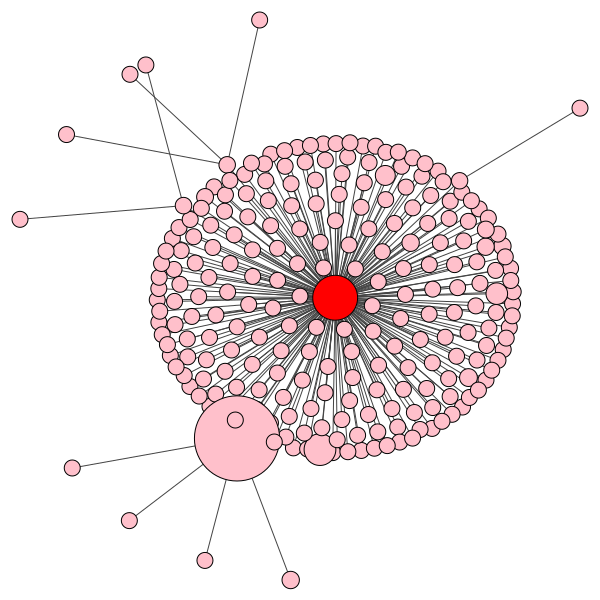

In [11]:
visualize_all_term(prune_go, term_entropy, prune_go.get_roots()[0])

Genes and Terms to keep: 18939


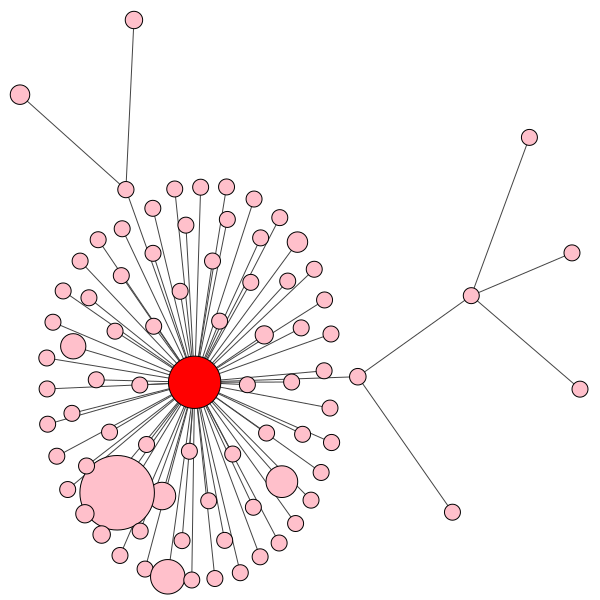

In [12]:
visualize_all_term(prune_go, term_entropy, prune_go.get_roots()[1])

Genes and Terms to keep: 17923


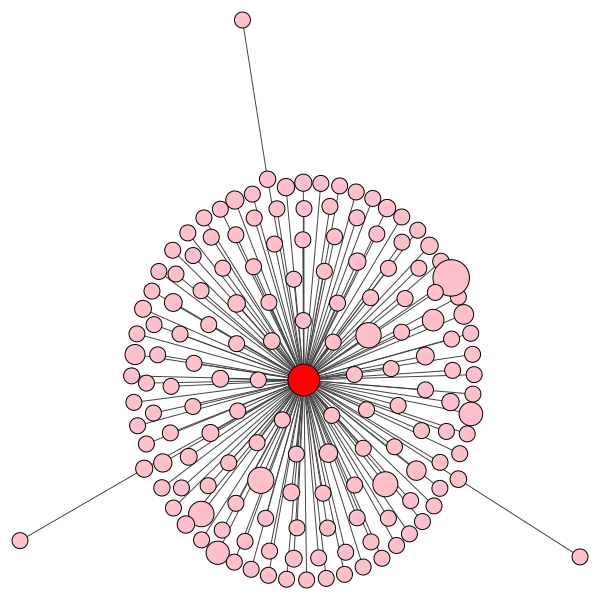

In [13]:
visualize_all_term(prune_go, term_entropy, prune_go.get_roots()[2])